In [3]:
# Basic Data Understanding (Pandas)
import pandas as pd
df=pd.read_csv("kroger_members.csv")
display(df.head(3))
display(df.shape)
display(df.columns)
display(df.isnull().sum())
display(df.duplicated().sum())
print("with membership:",df['has_member_card'].value_counts())
print("without membership:",df['has_member_card'].isnull().sum())

,kroger_id,has_member_card
0,1,Y
1,2,Y
2,3,NaN


(100, 2)

Index(['kroger_id', 'has_member_card'], dtype='object')

kroger_id           0
has_member_card    37
dtype: int64

np.int64(0)

with membership: has_member_card
Y    63
Name: count, dtype: int64
without membership: 37


In [4]:
#Data Cleaning
df['has_member_card']=df['has_member_card'].fillna('N')
display(df.head(2))
display(df['kroger_id'].dtype)
display(df['kroger_id'].nunique())
negative_ids = df[df['kroger_id'] < 0]
print("Negative IDs:\n", negative_ids)
invalid_ids = df[df['kroger_id'].isnull() | (df['kroger_id'] % 1 != 0)]
print("Invalid IDs:\n", invalid_ids)

,kroger_id,has_member_card
0,1,Y
1,2,Y


dtype('int64')

100

Negative IDs:
 Empty DataFrame
Columns: [kroger_id, has_member_card]
Index: []
Invalid IDs:
 Empty DataFrame
Columns: [kroger_id, has_member_card]
Index: []


100

np.int64(63)

percentage of customers membership: 63.0


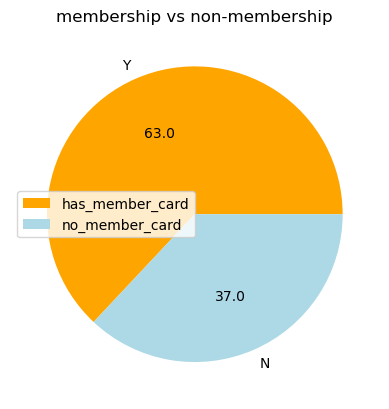

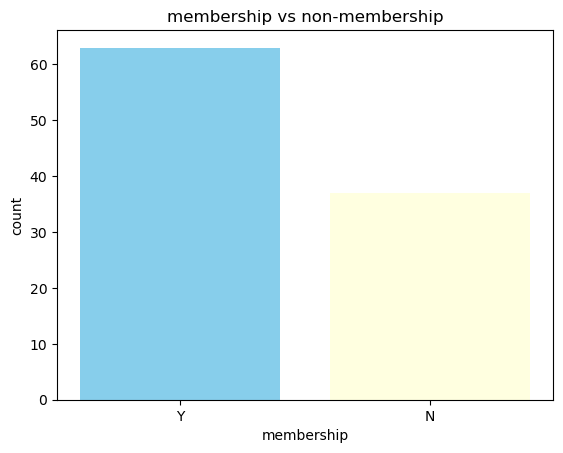

In [5]:
#Exploratory Data Analysis (EDA)
import matplotlib.pyplot as plt
display(df.shape[0])
display(df['has_member_card'].value_counts().iloc[0])
print("percentage of customers membership:",df['has_member_card'].value_counts().iloc[0]/df.shape[0]*100)
count=df['has_member_card'].value_counts()
plt.pie(count,labels=count.index,autopct='%1.1f',colors=('orange','lightblue'))
plt.title('membership vs non-membership')
plt.legend(['has_member_card','no_member_card'])
plt.show()
print("\n")
plt.bar(count.index,count.values,color=['skyblue','lightyellow'])
plt.title('membership vs non-membership')
plt.xlabel('membership')
plt.ylabel('count')
plt.show()

In [6]:
# Statistics
df['has_member_card']=df['has_member_card'].map({'Y':1,'N':0})
print(df['has_member_card'].mean())
print(df['has_member_card'].median())
print(df['has_member_card'].mode()[0])
print("Probability of having membership:",df['has_member_card'].mean())
print("Probability of not having membership:",1-df['has_member_card'].mean())

0.63
1.0
1
Probability of having membership: 0.63
Probability of not having membership: 0.37


In [7]:
#Linear Algebra & NumPy
import numpy as np
membership_binary = df['has_member_card'].values
print("Membership binary array:")
display(membership_binary)
np.random.seed(42)
spend_score = np.random.rand(len(membership_binary)) * 100
print("\nRandom spend score array:")
display(spend_score)
print("Result of vector addition:")
display(membership_binary + spend_score)
print("Result of dot product:")
display(np.dot(membership_binary, spend_score))
features = np.array([membership_binary, spend_score])
weights = np.array([0.5, 0.5])
display(np.dot(weights, features))

Membership binary array:


array([1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0])


Random spend score array:


array([37.45401188, 95.07143064, 73.19939418, 59.86584842, 15.60186404,
       15.59945203,  5.80836122, 86.61761458, 60.11150117, 70.80725778,
        2.05844943, 96.99098522, 83.24426408, 21.23391107, 18.18249672,
       18.34045099, 30.4242243 , 52.47564316, 43.19450186, 29.12291402,
       61.18528947, 13.94938607, 29.21446485, 36.63618433, 45.60699842,
       78.51759614, 19.96737822, 51.42344384, 59.24145689,  4.64504127,
       60.75448519, 17.05241237,  6.5051593 , 94.88855373, 96.56320331,
       80.83973481, 30.46137692,  9.7672114 , 68.42330265, 44.01524937,
       12.20382348, 49.51769101,  3.43885211, 90.93204021, 25.87799816,
       66.25222844, 31.17110761, 52.00680212, 54.67102793, 18.48544555,
       96.95846278, 77.51328234, 93.94989416, 89.48273504, 59.78999788,
       92.1874235 ,  8.84925021, 19.59828624,  4.52272889, 32.53303308,
       38.86772897, 27.13490318, 82.87375092, 35.67533267, 28.09345097,
       54.26960832, 14.0924225 , 80.21969808,  7.45506437, 98.68

Result of vector addition:


array([38.45401188, 96.07143064, 73.19939418, 60.86584842, 15.60186404,
       16.59945203,  5.80836122, 87.61761458, 61.11150117, 71.80725778,
        2.05844943, 96.99098522, 84.24426408, 21.23391107, 18.18249672,
       19.34045099, 30.4242243 , 53.47564316, 44.19450186, 29.12291402,
       62.18528947, 13.94938607, 30.21446485, 37.63618433, 45.60699842,
       79.51759614, 19.96737822, 52.42344384, 59.24145689,  5.64504127,
       60.75448519, 18.05241237,  7.5051593 , 95.88855373, 97.56320331,
       81.83973481, 30.46137692,  9.7672114 , 68.42330265, 45.01524937,
       13.20382348, 50.51769101,  3.43885211, 91.93204021, 25.87799816,
       67.25222844, 31.17110761, 53.00680212, 55.67102793, 19.48544555,
       97.95846278, 77.51328234, 94.94989416, 90.48273504, 60.78999788,
       93.1874235 ,  8.84925021, 19.59828624,  5.52272889, 33.53303308,
       39.86772897, 28.13490318, 83.87375092, 36.67533267, 29.09345097,
       55.26960832, 15.0924225 , 81.21969808,  8.45506437, 98.68

Result of dot product:


np.float64(3243.354074193494)

array([19.22700594, 48.03571532, 36.59969709, 30.43292421,  7.80093202,
        8.29972602,  2.90418061, 43.80880729, 30.55575059, 35.90362889,
        1.02922471, 48.49549261, 42.12213204, 10.61695553,  9.09124836,
        9.67022549, 15.21211215, 26.73782158, 22.09725093, 14.56145701,
       31.09264474,  6.97469303, 15.10723243, 18.81809216, 22.80349921,
       39.75879807,  9.98368911, 26.21172192, 29.62072844,  2.82252064,
       30.3772426 ,  9.02620618,  3.75257965, 47.94427686, 48.78160165,
       40.91986741, 15.23068846,  4.8836057 , 34.21165133, 22.50762469,
        6.60191174, 25.25884551,  1.71942606, 45.9660201 , 12.93899908,
       33.62611422, 15.5855538 , 26.50340106, 27.83551397,  9.74272278,
       48.97923139, 38.75664117, 47.47494708, 45.24136752, 30.39499894,
       46.59371175,  4.4246251 ,  9.79914312,  2.76136445, 16.76651654,
       19.93386448, 14.06745159, 41.93687546, 18.33766633, 14.54672548,
       27.63480416,  7.54621125, 40.60984904,  4.22753218, 49.34

In [8]:
#Feature Engineering
df['Is_Member'] = df['has_member_card']
display(df.head())
np.random.seed(42)
df['Monthly_Spend'] = np.random.uniform(50, 500, size=len(df))
display(df.head())
df['Discount_Eligible'] = ((df['Is_Member'] == 1) & (df['Monthly_Spend'] > 200))
display(df.head())
df['membership_quartiles'] = pd.qcut(df['Monthly_Spend'], q=4, labels=False)
display(df.head())
display(df['membership_quartiles'].value_counts())

,kroger_id,has_member_card,Is_Member
0,1,1,1
1,2,1,1
2,3,0,0
3,4,1,1
4,5,0,0


,kroger_id,has_member_card,Is_Member,Monthly_Spend
0,1,1,1,218.543053
1,2,1,1,477.821438
2,3,0,0,379.397274
3,4,1,1,319.396318
4,5,0,0,120.208388


,kroger_id,has_member_card,Is_Member,Monthly_Spend,Discount_Eligible
0,1,1,1,218.543053,True
1,2,1,1,477.821438,True
2,3,0,0,379.397274,False
3,4,1,1,319.396318,True
4,5,0,0,120.208388,False


,kroger_id,has_member_card,Is_Member,Monthly_Spend,Discount_Eligible,membership_quartiles
0,1,1,1,218.543053,True,1
1,2,1,1,477.821438,True,3
2,3,0,0,379.397274,False,3
3,4,1,1,319.396318,True,2
4,5,0,0,120.208388,False,0


membership_quartiles
1    25
3    25
2    25
0    25
Name: count, dtype: int64

In [9]:
#SQL Simulation in Pandas
members_high_spend = df[(df['Is_Member'] == 1) & (df['Monthly_Spend'] > 300)]
print("Customers who are members and spend more than $300 per month:")
display(members_high_spend.head(5))
top_10_spenders_members = df[df['Is_Member'] == 1].sort_values(by='Monthly_Spend', ascending=False).head(10)
print("Top 10 highest spenders among members:")
display(top_10_spenders_members.head(3))
sorted_customers = df.sort_values(by=['Monthly_Spend', 'kroger_id'], ascending=[False, True])
print("Customers sorted by Monthly_Spend (descending) and kroger_id (ascending):")
display(sorted_customers.head(3))
discount_eligible_counts = df['Discount_Eligible'].value_counts()
print("Count of customers in each Discount_Eligible group:")
display(discount_eligible_counts.head(3))

Customers who are members and spend more than $300 per month:


,kroger_id,has_member_card,Is_Member,Monthly_Spend,Discount_Eligible,membership_quartiles
1,2,1,1,477.821438,True,3
3,4,1,1,319.396318,True,2
7,8,1,1,439.779266,True,3
8,9,1,1,320.501755,True,2
9,10,1,1,368.632660,True,2


Top 10 highest spenders among members:


,kroger_id,has_member_card,Is_Member,Monthly_Spend,Discount_Eligible,membership_quartiles
50,51,1,1,486.313082,True,3
34,35,1,1,484.534415,True,3
1,2,1,1,477.821438,True,3


Customers sorted by Monthly_Spend (descending) and kroger_id (ascending):


,kroger_id,has_member_card,Is_Member,Monthly_Spend,Discount_Eligible,membership_quartiles
69,70,0,0,494.099121,False,3
11,12,0,0,486.459433,False,3
50,51,1,1,486.313082,True,3


Count of customers in each Discount_Eligible group:


Discount_Eligible
False    56
True     44
Name: count, dtype: int64

In [10]:
print(f"Percentage of customers who are members: {(df['Is_Member'].sum() / df.shape[0]) * 100:.2f}%")
print("Average monthly spend by membership status:")
display(df.groupby('Is_Member')['Monthly_Spend'].mean())
top_quartile= df[(df['Is_Member'] == 1) & (df['membership_quartiles'] == 3)]['Monthly_Spend'].mean()
bottom_quartile = df[(df['Is_Member'] == 1) & (df['membership_quartiles'] == 0)]['Monthly_Spend'].mean()
spending_difference = top_quartile- bottom_quartile
print(f"Spending difference between top and bottom quartile members: {spending_difference:.2f}")
high_spenders = df[df['membership_quartiles'] == 3]
print("High spenders (top quartile of monthly spend):")
display(high_spenders.head(3))
print(f"\nAre high spenders always members? {high_spenders['Is_Member'].all()}")
print("\nMembership counts among high spenders:")
display(high_spenders['Is_Member'].value_counts())

Percentage of customers who are members: 63.00%
Average monthly spend by membership status:


Is_Member
0    227.379463
1    281.668148
Name: Monthly_Spend, dtype: float64

Spending difference between top and bottom quartile members: 344.90
High spenders (top quartile of monthly spend):


,kroger_id,has_member_card,Is_Member,Monthly_Spend,Discount_Eligible,membership_quartiles
1,2,1,1,477.821438,True,3
2,3,0,0,379.397274,False,3
7,8,1,1,439.779266,True,3



Are high spenders always members? False

Membership counts among high spenders:


Is_Member
1    18
0     7
Name: count, dtype: int64